### To predict heart disease...
Steps for machine learning workflow:
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems.
3. Fit the model/algorithm and use it to make predictions on our data.
4. Evaluating a model
5. Improve a model
6. Save and load a trained model

**If we get accuracy of 95%, we will take the project as successful**

Attributes on the data set:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Getting the data ready

In [160]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [161]:
df.shape

(303, 14)

How many of each class there are?

In [162]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking if there are missing values

In [164]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease frequency according to sex

In [165]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [166]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot: xlabel='target'>

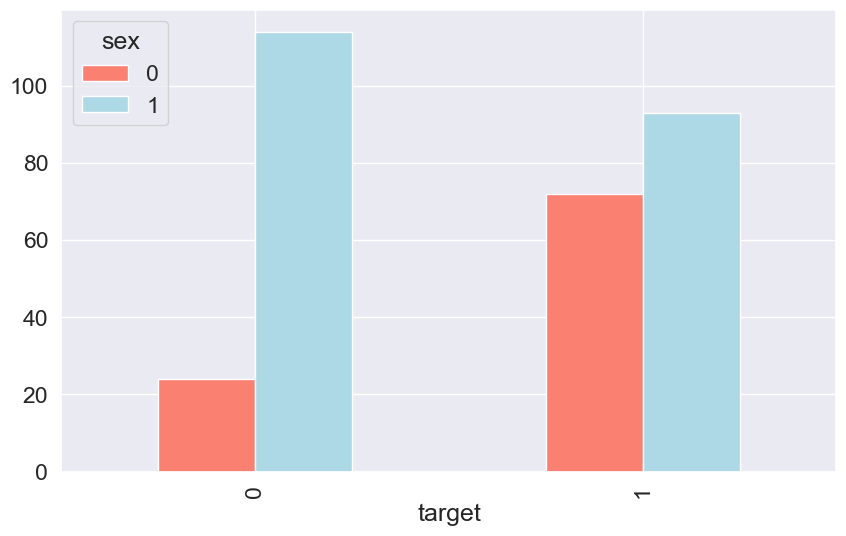

In [167]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                         figsize=(10, 6),
                                         color=["salmon", "lightblue"])

### Comparing thalach, age vs target

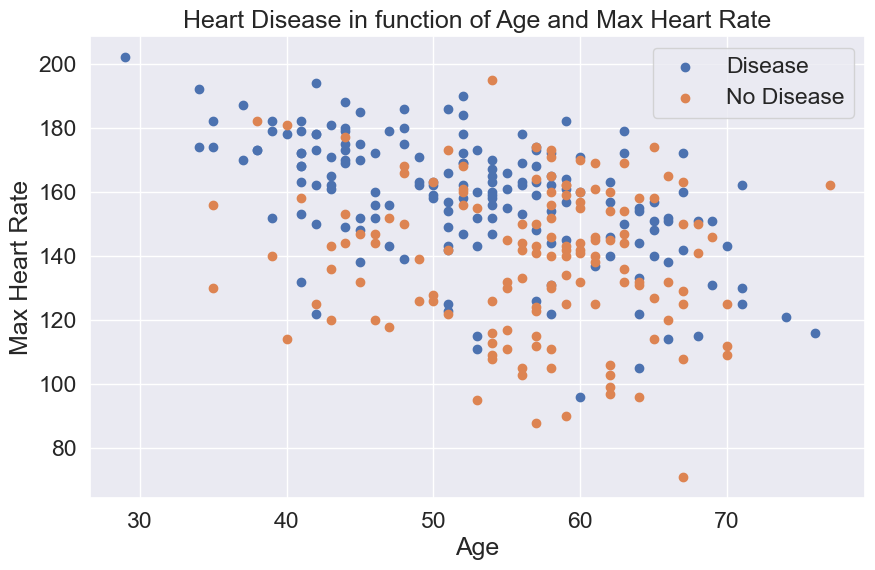

In [168]:
plt.figure(figsize=(10, 6))
# Scatter with positive examples
plt.scatter(df["age"][df["target"] == 1], 
           df["thalach"][df["target"] == 1])

# Scatter with negative examples
plt.scatter(df["age"][df["target"] == 0],
           df["thalach"][df["target"] == 0])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

# the trend we find is that younger people have higher heart rates

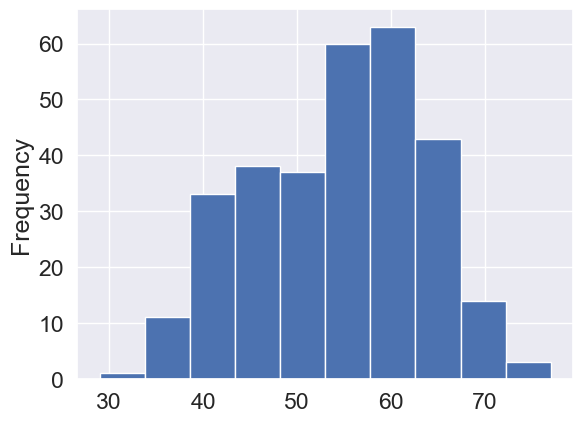

In [169]:
df.age.plot.hist();
# most of the samples are around 60

### Comparing cp (chest pain) against target

In [170]:
pd.crosstab(df.cp, df.target)
# The higher the chest pain, the higher chance of having heart disease

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [171]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


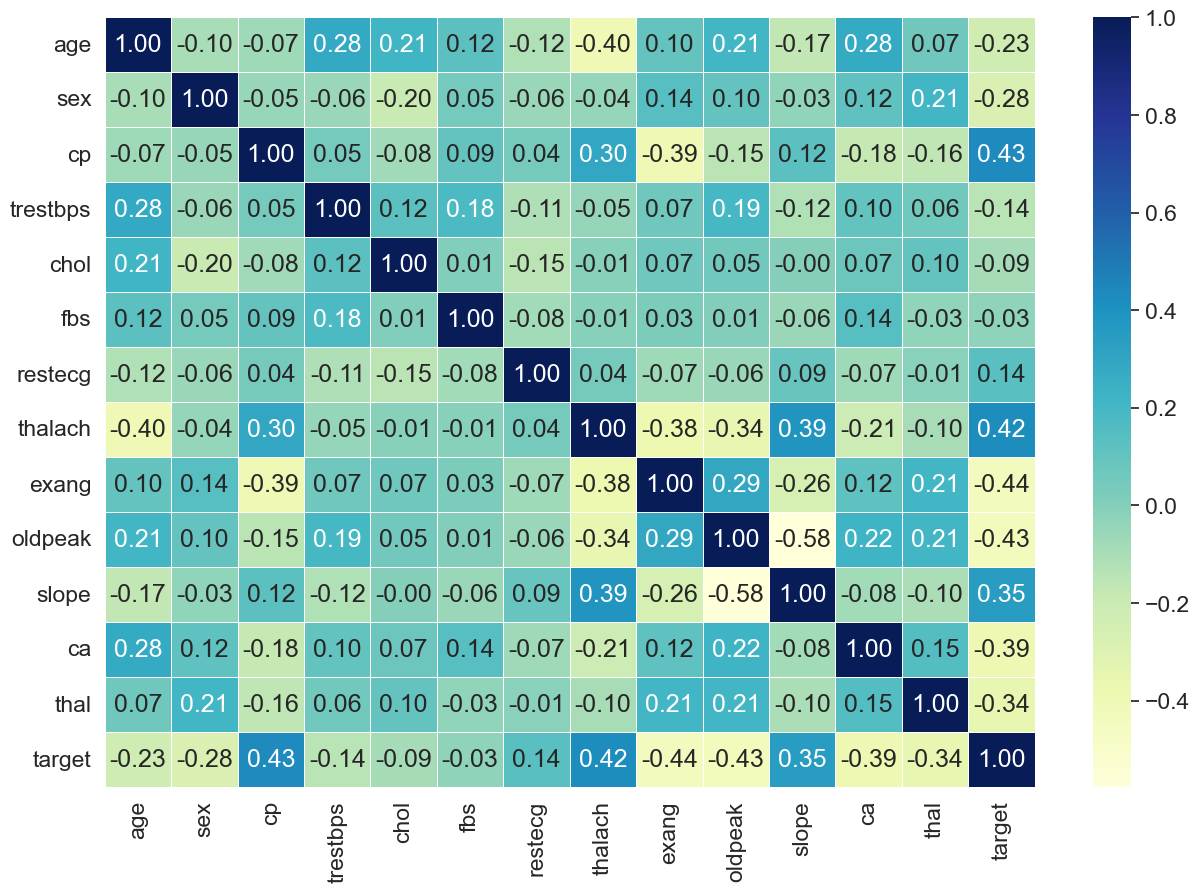

In [172]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
# Higher positive means higher correlation, for example in terms of cp and target,
# if cp goes up, target goes up

## Choose the right estimator/algorithm for our problems.

In [173]:
# split to x and y
x = df.drop("target", axis=1)
y = df["target"]

In [174]:
# split data into training and test sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

We'll try 3 different models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

## Evaluating a model

In [175]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    # key, value in models dictionary
    for name, model in models.items():
        model.fit(x_train, y_train)
        # evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [176]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot: >

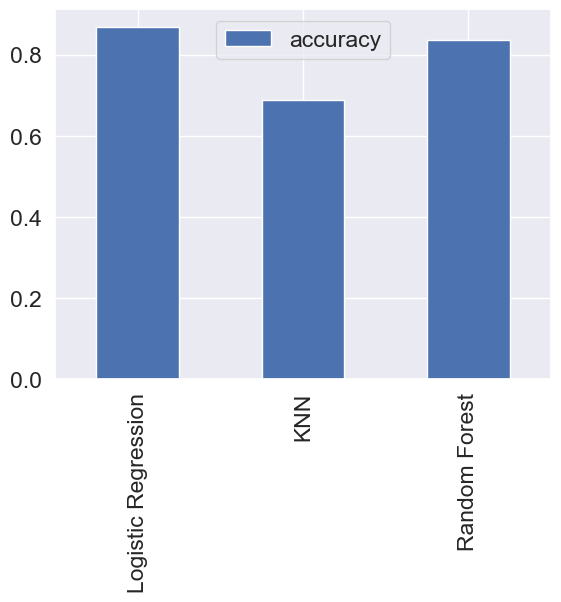

In [177]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

## Improve a model

Baseline scores can always be tried to be improved. 
To improve, we can try out:
1. Hyperparameter Tuning
2. Feature importance
3. Confusion matrix
4. Cross validation
5. Precision
6. Recall
7. F1-score
8. Classification report
9. ROC Curve
10. Area under curve (AUC)

### Hyperparameter tuning (by hand) (More efficient way of hyperparameter tuning done later for next models)
3 ways to do hyperparameter tuning:
1. By hand
2. RandomizedSearchCV
3. GridSearchCV

Each of these has been explored

In [178]:
# Tuning KNN
train_scores = []
test_scores = []

knn = KNeighborsClassifier()
for i in range(1, 21):
    np.random.seed(42)
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    # updating the train_scores list
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))


Max Test Score on KNN: 75.41


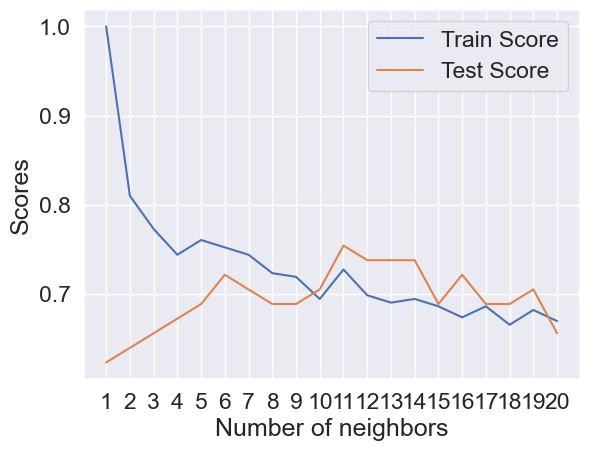

In [179]:
plt.plot(range(1, 21), train_scores, label="Train Score")
plt.plot(range(1, 21), test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.legend()
print(f"Max Test Score on KNN: {max(test_scores)*100:.2f}")

It is quite inefficient with the way we hyperparameter tuned KNN if we have set different for loop each time, and it becomes even more complicated if we have different and a lot of parameters. That's why for the next models, we will use Randomized Search CV, which it's going to try a number of different combinations of hyper parameters for us and evaluate which ones are the best and then save them for us.

### Hyperparameter tuning with RandomizedSearchCV for LogisticRegression & RandomForest

In [180]:
# hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
# hyperparameter grid for random forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),}

Now, we've got hyperparameter grids setup for each models, lets tune with RandomizedSearchCV for logistic regression

In [181]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20, # try 20 different combination each iteration of hyperparams
                                verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [182]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [183]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Logistic Regression hyperparameter tuning done. Now let's tune random forest

In [184]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, 
                           cv=5, 
                           n_iter=20, # randomly try 20 different combination of hyperparameters
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [185]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [186]:
rs_rf.score(x_test, y_test)

0.8688524590163934

Turns out the default logistic regression still is better than randomForest. Not let's try out GridSearchCV, which exhaustively searches for hyperparameters i.e trying very single parameter combination and finds the best one, rather than trying out random combinations of hyperparameters like RandomizedSearchCV.

We've eliminated KNN, when we did hyperparameter tuning by hand, and now are eliminating RandomForest after doing RandomizedSearchCV, because comparitively LogisticRegression performed better than RandomForest
### Hyperparameter tuning with Logistic Regression GridSearchCV
Since, LogisticRegression performs the best, we'll try and improve again with GridSearchCV

In [187]:
# different hyperparameters for our LogisticRegression Model
np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}
# setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [188]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [189]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## More Evaluations
1. ROC Curve and AUC Score
2. Confusion Matrix
3. Classification Report
4. Precision
5. Recall
6. F1-Score

To make comparisons and evaluate our model, first we need to make predictions

In [190]:
y_preds = gs_log_reg.predict(x_test)

A perfect AUC score is 1.0

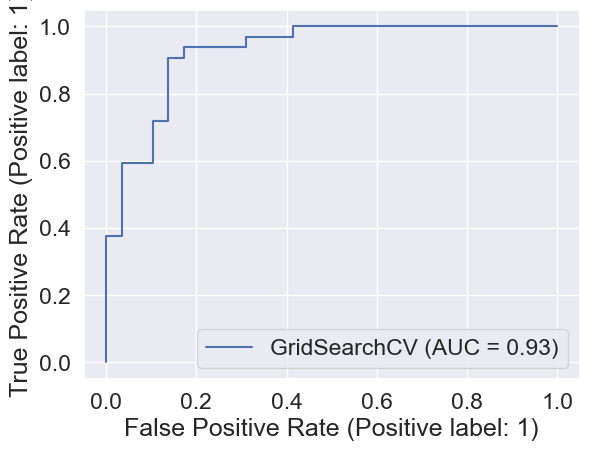

In [191]:
# plot roc curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

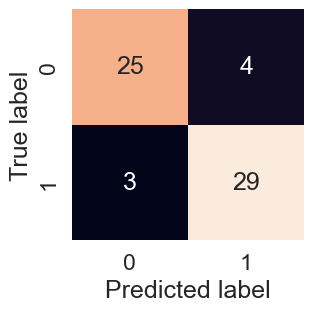

In [192]:
sns.set_theme(font_scale=1.5)
def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
#     plt.xlabel("True Label")
#     plt.ylabel("Predicted Label")
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_confusion_matrix(y_test, y_preds)

Now, we've got ROC Curve, AUC metric, and confusion matrix, let's get classification report as well as cross-validated precision, recall and f1-score.

The below is only being done on 1 set of test split (train test split), but we need cross-validated ones amongst each set on the cross validation

In [193]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation
Get different evaluation metrics from Logistic Regression's best parameter model that was finalized

In [194]:
bestModel = LogisticRegression(C=gs_log_reg.best_params_["C"], solver=gs_log_reg.best_params_["solver"])

In [195]:
# Cross validation accuracy
cv_acc = cross_val_score(bestModel, x, y, cv=5, scoring="accuracy")
cv_acc.mean()

0.8446994535519124

In [196]:
# Cross validation precision
cv_precision = cross_val_score(bestModel, x, y, cv=5, scoring="precision")
cv_precision.mean()

0.8207936507936507

In [197]:
# Cross validation recall
cv_recall = cross_val_score(bestModel, x, y, cv=5, scoring="recall")
cv_recall.mean()

0.9212121212121213

In [198]:
# Cross validation f1
cv_f1 = cross_val_score(bestModel, x, y, cv=5, scoring="f1")
cv_f1.mean()

0.8673007976269721

<AxesSubplot: title={'center': 'Cross-validated classification metrics'}>

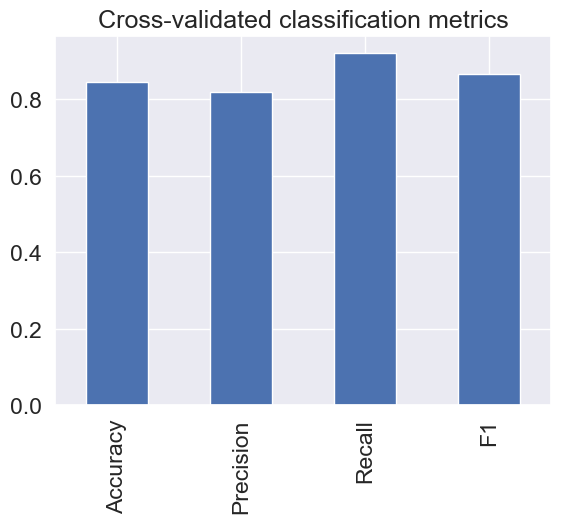

In [199]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc.mean(), 
                          "Precision": cv_precision.mean(),
                           "Recall": cv_recall.mean(),
                          "F1": cv_f1.mean()},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

### Now to do feature importance..
Feature importance describes which features contributed the most to the model and how did they contribute

In [200]:
bestModel.fit(x_train, y_train)
bestModel.coef_
# Match coefs of features to columns
feature_dict = dict(zip(df.columns, list(bestModel.coef_[0])))
feature_dict

{'age': 0.0031672816664025417,
 'sex': -0.8604466164764594,
 'cp': 0.660670378971457,
 'trestbps': -0.011569931858994414,
 'chol': -0.0016637446649201797,
 'fbs': 0.04386106245399992,
 'restecg': 0.31275852888688666,
 'thalach': 0.024593614591211826,
 'exang': -0.6041308666006405,
 'oldpeak': -0.5686279913648149,
 'slope': 0.45051630416484045,
 'ca': -0.636099010407402,
 'thal': -0.6766337677461476}

bar in the positive marking indicate as the feature increases, the model is more likely to predict a higher value of the target i.e has heart disease

<AxesSubplot: title={'center': 'Feature Importance'}>

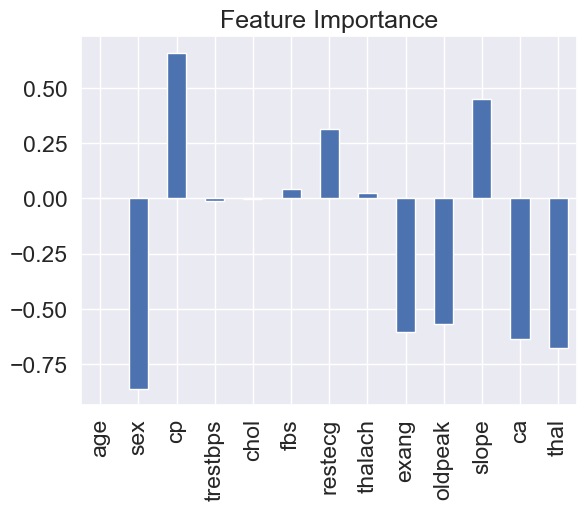

In [201]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)